[DATASET LINK](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)

Import Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

In [ ]:
# Read the CSV file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/aqi/city_day.csv')
df1['City'].unique()


array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
# Filtering data for Delhi
df = df1[df1['City'] == 'Delhi']
print ("Shape:",df.shape)

Shape: (2009, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
df.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [ ]:
# # Droping unnecessary columns
df = df.drop(['Xylene','Toluene','Benzene','NO'], axis=1)

In [ ]:
# Droping rows with missing values
df = df.dropna()

Data Visualization


<ipython-input-55-88fb7dbd5ff2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

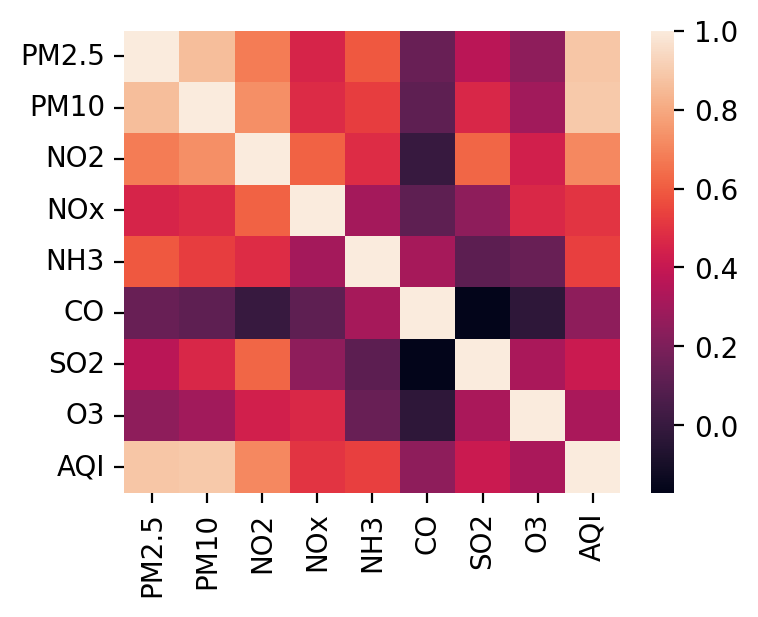

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(4, 3), dpi=200) #dpi is dots per inches
sns.heatmap(df.corr())


<Axes: >

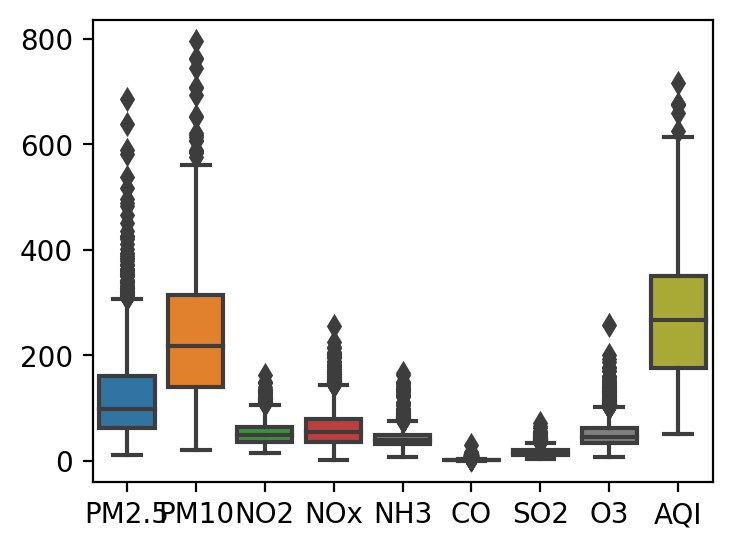

In [ ]:
# Boxplot
plt.figure(figsize=(4, 3), dpi=200)
sns.boxplot(data=df)


In [ ]:
# Scatter plot
plt.figure(figsize=(4, 3), dpi=200)
palette = {'Good': "g", 'Poor': "C0", 'Very Poor': "C1", 'Severe': "r", "Moderate": 'b', "Satisfactory": 'y'}
sns.scatterplot(x='AQI', y='PM2.5', data=df, hue='AQI_Bucket', palette=palette)

Removing outliers so that extreme values do not disproportionately influence the results or visualizations.


In [ ]:
drop_outlier = df[(df['AQI'] > 650) | (df['PM2.5'] > 500) | (df['NH3'] > 150) | (df['NO2'] > 160) | (df['NOx'] > 200) | (df['PM10'] > 700)| (df['O3'] > 200)].index
df = df.drop(drop_outlier)


<Axes: >

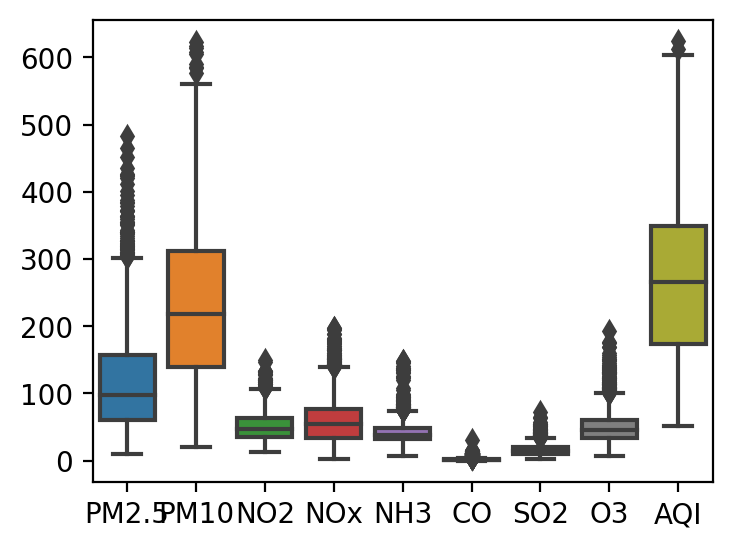

In [ ]:
# Boxplot after removing outliers
plt.figure(figsize=(4, 3), dpi=200)
sns.boxplot(data=df)


Feature and target variable Selection, Normalization and Data Splitting


In [ ]:
# X = df.drop(['City', 'AQI_Bucket', 'AQI', 'NH3', 'NOx', 'NO', 'Date'], axis=1)
# y = df['AQI']

X = df.drop(['City', 'AQI_Bucket', 'AQI', 'Date'], axis=1)
y = df['AQI']

In [ ]:
# Data scaling
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # (x - mean) / standard deviation


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=101)


Training and Testing Models

In [ ]:
# Using grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVR(), param_grid, verbose=1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

# Model Evaluation
grid_mae = mean_absolute_error(y_test, grid_pred)
grid_mse = mean_squared_error(y_test, grid_pred)
grid_r2 = r2_score(y_test, grid_pred)

print("The Mean Absolute Error of our Model is {}".format(round(grid_mae, 2)))
print("The Mean Squared Error of our Model is {}".format(round(grid_mse, 2)))
print("R-squared:", grid_r2.round(2))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
The Mean Absolute Error of our Model is 24.89
The Mean Squared Error of our Model is 1235.92
R-squared: 0.91


In [ ]:
# Creating a Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_pred = linear_regression.predict(X_test)

# Model Evalution
lr_mae = mean_absolute_error(y_test, linear_regression_pred)
lr_mse = mean_squared_error(y_test, linear_regression_pred)
lr_r2 = r2_score(y_test, linear_regression_pred)

print("The Mean Absolute Error of our Model is {}".format(round(lr_mae, 2)))
print("The Mean Squared Error of our Model is {}".format(round(lr_mse, 2)))
print("R-squared:", lr_r2.round(2))


The Mean Absolute Error of our Model is 33.27
The Mean Squared Error of our Model is 1799.76
R-squared: 0.87


In [ ]:
# Creating Random Forest model
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Model Evalution
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("The Mean Absolute Error of our Model is {}".format(round(rf_mae, 2)))
print("The Mean Squared Error of our Model is {}".format(round(rf_mse, 2)))
print("R-squared:", rf_r2.round(2))


The Mean Absolute Error of our Model is 24.63
The Mean Squared Error of our Model is 1166.22
R-squared: 0.91


In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

dt_pred = decision_tree.predict (X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test,dt_pred)
dt_r2 = r2_score(y_test , dt_pred)

print("The Mean Absolute Error of our Model is {}".format(round(dt_mae, 2)))
print("The Mean Squared Error of our Model is {}".format(round(dt_mse, 2)))
print("R-squared:", dt_r2.round(2))



The Mean Absolute Error of our Model is 32.79
The Mean Squared Error of our Model is 2060.53
R-squared: 0.85


Concatenated model



In [ ]:
# Define the base models
base_models = [
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor(random_state=0)),
    ('linear_regression', LinearRegression()),
    ('svr', SVR())
]

# Define the final stacked model
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator= LinearRegression()
)

# Fiting the stacked model
stacked_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = stacked_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test,dt_pred)
r2 = r2_score(y_test , dt_pred)

print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))
print("The Mean Squared Error of our Model is {}".format(round(mse, 2)))
print("R-squared:", r2.round(2))


The Mean Absolute Error of our Model is 32.79
The Mean Squared Error of our Model is 2060.53
R-squared: 0.85
